---
tags: ["cours", "terminale", "lycée", "numérique et sciences informatiques", "nsi"]
---

::: programme

+---------------------+--------------------------------+---------------------------------------+
|      Contenus       |      Capacités attendues       |             Commentaires              |
+=====================+================================+=======================================+
| Algorithmes sur les | Parcourir un graphe en         | Le parcours d’un labyrinthe et le     |
| graphes.            | profondeur d’abord, en largeur | routage dans Internet sont des        |
|                     | d’abord.                       | exemples d’algorithme sur les         |
|                     |                                | graphes.                              |
|                     | Repérer la présence d’un cycle |                                       |
|                     | dans un graphe.                | L’exemple des graphes permet          |
|                     |                                | d’illustrer l’utilisation des classes |
|                     | Chercher un chemin dans un     | en programmation.                     |
|                     | graphe.                        |                                       |
+---------------------+--------------------------------+---------------------------------------+

:::

::: intro clearfix

<p><a href="https://commons.wikimedia.org/wiki/File:Journal.pone.0082873.g001.png#/media/File:Journal.pone.0082873.g001.png"><img class="half right" src="https://upload.wikimedia.org/wikipedia/commons/9/9c/Journal.pone.0082873.g001.png" alt="Journal.pone.0082873.g001.png"></a><br>By Bumhee Park, Dae-Shik Kim, Hae-Jeong Park - <a rel="nofollow" class="external free" href="http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0082873">http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0082873</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=59853041">Link</a></p>

> Dans ce chapitre, nous allons voir quelques algorithmes classiques sur les
> [graphe](../../1-structures-de-donnees/5-graphes)s. Pour mémoire, un graphe est un ensemble de
> sommets reliés entre eux par des arêtes sans aucune contrainte sur la façon dont sont reliés les
> sommets par opposition aux arbres qui présente une racine, et une relation de descendance.

:::


## Présentation du module `networkx`

Pour travailler sur ce chapitre, nous allons utiliser la librairie [`networkx`](https://networkx.github.io/documentation/stable/index.html) qui permet de facilement créer, manipuler et représenter les graphes en Python.

Nous n'entrerons pas dans les détails de tout ce que l'on peut faire avec cette libraririe, mais nous utiliserons la classe `Graph` que nous instancierons sous la variable `G`.

La librairie étant écrite en anglais, il faut connaitre les traductions suivantes:

- **Sommet/Noeud**: _node_
- **Arête/lien**: _edge_
- **Graphe**: _graph_
- **Voisins**: _neighbors_

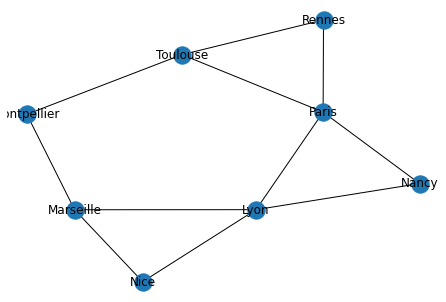

In [1]:
import networkx as nx
import matplotlib.pyplot as plt # pour les représentations graphiques

def create_graph():
    G = nx.Graph()

    # Ajout des noeuds nommés
    G.add_node("Paris")
    G.add_node("Lyon")
    G.add_node("Marseille")
    G.add_node("Nice")
    G.add_node("Montpellier")
    G.add_node("Toulouse")
    G.add_node("Rennes")
    G.add_node("Nancy")

    # Ajout des arêtes
    G.add_edge("Paris", "Lyon")
    G.add_edge("Lyon", "Marseille")
    G.add_edge("Nice", "Marseille")
    G.add_edge("Nice", "Lyon")
    G.add_edge("Montpellier", "Marseille")
    G.add_edge("Montpellier", "Toulouse")
    G.add_edge("Paris", "Toulouse")
    G.add_edge("Rennes", "Toulouse")
    G.add_edge("Rennes", "Paris")
    G.add_edge("Nancy", "Paris")
    G.add_edge("Nancy", "Lyon")
    
    return G
# création du graph
G =create_graph()
# Représenation graphique
nx.draw(G, with_labels=True) # Il s'agit du graphe et non d'une carte!

On peut obtenir la **matrice d'adjacence** représentant le graphe.

In [2]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0., 0., 0., 1., 1., 1.],
        [1., 0., 1., 1., 0., 0., 0., 1.],
        [0., 1., 0., 1., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.]])

Mais également sous la forme d'une liste d'adjacence comme nous l'avions vu dans le chapitre sur la structure de données [graphe](/tg/nsi/1-structures-de-donnees/4-graphes) (ou bien d'autres formes voir [doc](https://networkx.org/documentation/stable/reference/convert.html)).

In [3]:
nx.to_dict_of_lists(G)

{'Paris': ['Lyon', 'Toulouse', 'Rennes', 'Nancy'],
 'Lyon': ['Paris', 'Marseille', 'Nice', 'Nancy'],
 'Marseille': ['Lyon', 'Nice', 'Montpellier'],
 'Nice': ['Marseille', 'Lyon'],
 'Montpellier': ['Marseille', 'Toulouse'],
 'Toulouse': ['Montpellier', 'Paris', 'Rennes'],
 'Rennes': ['Toulouse', 'Paris'],
 'Nancy': ['Paris', 'Lyon']}

## Parcourir un graphe

Tous comme pour les arbres, il est possible de réaliser deux types de parcours d'un arbre:

- le parcours en profondeur(_Depth-First Search_)
- le parcours en largeur(_Breadth First Search_)

Cependant, contrairement aux arbres

- il n'y a pas de racine, donc on doit choisir à partir de quel noeud on part: le noeud source.
- il peut y avoir un nombre quelconque d'arêtes, et il faut donc _marquer_ les chemins déjà empruntés lors du parcours.


### Parcours en profondeur

> L'exploration d'un parcours en profondeur depuis un sommet S fonctionne comme suit. Il poursuit alors un chemin dans le graphe jusqu'à un cul-de-sac ou alors jusqu'à atteindre un sommet déjà visité. Il revient alors sur le dernier sommet où on pouvait suivre un autre chemin puis explore un autre chemin (voir vidéo ci-contre). L'exploration s'arrête quand tous les sommets depuis S ont été visités. Bref, l'exploration progresse à partir d'un sommet S en s'appelant récursivement pour chaque sommet voisin de S. 

*[Article Wikipédia sur l'Algorithme de parcours en profondeur][wkp_dfs]*{.cite-source}

Nous allons utiliser l'algorithme proposé sur l'article Wikipedia anglais:

```
PROCEDURE parcours_en_profondeur(G graph, s sommet)
    marquer v comme visté
    POUR TOUS les sommets voisins v de s FAIRE
        SI v n'est pas marqué comme visité ALORS
            APPELER RECURSIVEMENT parcours_en_prfondeur(G, v)
```

### Implémentation en Python

Nous allons implémenter la procédure `parcours_en_profondeur` proposée précedemment.

```
PROCEDURE parcours_en_profondeur(G graph, s sommet)
    marquer v comme visté
    POUR TOUS les sommets voisins v de s FAIRE
        SI v n'est pas marqué comme visité ALORS
            APPELER RECURSIVEMENT parcours_en_prfondeur(G, v)
```

Il parait préférable d'utiliser une liste d'adjacence ici puisque l'on a besoin d'accéder aux voisins fréquemment.

Liste d'adjacence
-----------------
{'Paris': ['Lyon', 'Toulouse', 'Rennes', 'Nancy'], 'Lyon': ['Paris', 'Marseille', 'Nice', 'Nancy'], 'Marseille': ['Lyon', 'Nice', 'Montpellier'], 'Nice': ['Marseille', 'Lyon'], 'Montpellier': ['Marseille', 'Toulouse'], 'Toulouse': ['Montpellier', 'Paris', 'Rennes'], 'Rennes': ['Toulouse', 'Paris'], 'Nancy': ['Paris', 'Lyon']}

Liste des noeuds visités par notre algorithme
---------------------------------------------
Nice
Marseille
Lyon
Paris
Toulouse
Montpellier
Rennes
Nancy
None

Pour rappel: Forme du graphe
------------------------------


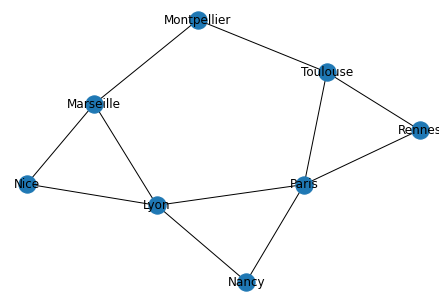

In [4]:
G = create_graph()
dg =nx.to_dict_of_lists(G)
print("Liste d'adjacence")
print("-----------------")
print(dg)
def parcours_profondeur(G, s):
    # on récupère la liste des voisins
    voisins = G[s]
    # afficher le sommet
    print(s)
    # marquer le sommet s(je le supprime car visité)
    # ATTENTION modification globale car passage par référence
    del G[s]
    # POUR TOUT sommet t voisin du sommet s
    for t in voisins:
        # SI t n'est pas marqué ALORS
        if t in G:
            parcours_profondeur(G, t)


print("\nListe des noeuds visités par notre algorithme")
print("---------------------------------------------")
print(parcours_profondeur(dg, "Nice"))

print("\nPour rappel: Forme du graphe")
print("------------------------------")
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

### Vérification avec `networkx`

La librairie `networkx` implémente cette traversée avec la méthode `dfs_edges`, nous allons examiner sa sortie à partir du sommet `Nice` pour comparer les sorties.

Liste des chemins suivis
------------------------
[('Nice', 'Marseille'), ('Marseille', 'Lyon'), ('Lyon', 'Paris'), ('Paris', 'Toulouse'), ('Toulouse', 'Montpellier'), ('Toulouse', 'Rennes'), ('Paris', 'Nancy')]

Représentation sous forme d'arbre
---------------------------------


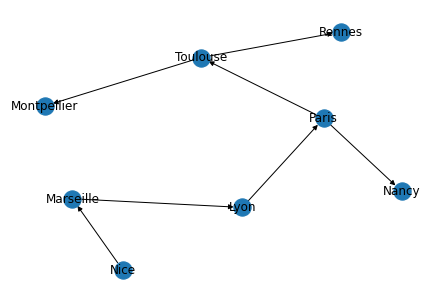

In [5]:
print("Liste des chemins suivis")
print("------------------------")
print(list(nx.dfs_edges(G, source="Nice")))

print("\nReprésentation sous forme d'arbre")
print("---------------------------------")
tree = nx.dfs_tree(G, source="Nice")
nx.draw(tree, with_labels=True, pos=nx.spring_layout(G))

L'ordre de parcours des chemins dépend de l'ordre dans lequel les voisins sont rangés dans la liste des voisins. Cependant on observe bien que l'algorithme avance tant qu'il ne trouve pas un noeud déjà visité.

::: appli

- Reproduire le graphe est l'annoter avec des flèches numérotées pour indiquer l'ordre de viste.
- Faire apparaitre les demi-tours(_backtrack en anglais_).
- Proposer un autre parcours en profondeur au départ de Nice.

:::

### Parcours en largeur

> L'algorithme de parcours en largeur (ou BFS, pour Breadth First Search en anglais) permet le parcours d'un graphe ou d'un arbre de la manière suivante : on commence par explorer un nœud source, puis ses successeurs, puis les successeurs non explorés des successeurs, etc. L'algorithme de parcours en largeur permet de calculer les distances de tous les nœuds depuis un nœud source dans un graphe non pondéré (orienté ou non orienté).

*[Article Wikipédia sur l'Algorithme de parcours en largeur][wkp_bfs]*{.cite-source}

Nous allons implémenter cet algorithme à l'aide d'une file:

```
 FONCTION parcours_largeur(Graphe G, Sommet s):
       f = CreerFile();
       f.enfiler(s);
       marquer(s);
       TANT QUE la file est non vide
                s = f.defiler();
                afficher(s);
                POUR TOUT voisin t de s dans G
                         SI t non marqué
                                 f.enfiler(t);
                                 marquer(t);
```

### Implémentation en Python

Nous allons implémenter la procédure `parcours_en_largeur` proposée précedemment.

```
 FONCTION parcours_largeur(Graphe G, Sommet s):
       f = CreerFile();
       f.enfiler(s);
       marquer(s);
       TANT QUE la file est non vide
                s = f.defiler();
                afficher(s);
                POUR TOUT voisin t de s dans G
                         SI t non marqué
                                 f.enfiler(t);
                                 marquer(t);
```

Encore une fois je vais utiliser une liste d'adjacence pour facilement accéder aux voisins. On utilise une liste locale `marqués` pour stocker les noeuds visités.

Liste d'adjacence
-----------------
{'Paris': ['Lyon', 'Toulouse', 'Rennes', 'Nancy'], 'Lyon': ['Paris', 'Marseille', 'Nice', 'Nancy'], 'Marseille': ['Lyon', 'Nice', 'Montpellier'], 'Nice': ['Marseille', 'Lyon'], 'Montpellier': ['Marseille', 'Toulouse'], 'Toulouse': ['Montpellier', 'Paris', 'Rennes'], 'Rennes': ['Toulouse', 'Paris'], 'Nancy': ['Paris', 'Lyon']}
Liste des noeuds visités par notre algorithme
---------------------------------------------
Nice
Marseille
Lyon
Montpellier
Paris
Nancy
Toulouse
Rennes
None

Pour rappel: Forme du graphe
------------------------------


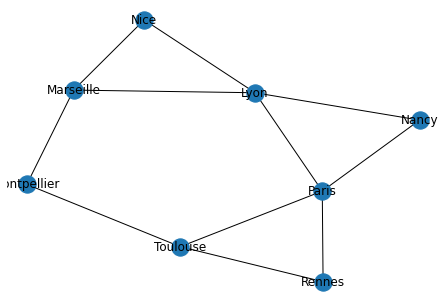

In [6]:
# On importe deque pour la file
from collections import deque as file

# On repart d'un graphe tout neuf
G = create_graph()
dg =nx.to_dict_of_lists(G)
print("Liste d'adjacence")
print("-----------------")
print(dg)

# FONCTION parcours_largeur(Graphe G, Sommet s):
def parcours_largeur(G, s):
    #f = CreerFile();
    f = file()
    #f.enfiler(s);
    f.appendleft(s)
    # marquer(s);
    marqués = [s]
    #TANT QUE la file est non vide
    while f:
        #s = f.defiler();
        s = f.pop()
        # afficher(s);
        print(s)
        #POUR TOUT voisin t de s dans G
        for t in G[s]:
            # SI t non marqué
            if t not in marqués:
                #f.enfiler(t);
                f.appendleft(t)
                #marquer(t);
                # marquer le sommet s
                marqués.append(t)
                #node["visited"] =  True
                

print("Liste des noeuds visités par notre algorithme")
print("---------------------------------------------")
print(parcours_largeur(dg, "Nice"))
# je ne sais pas d'ou vient ce dernier None!

print("\nPour rappel: Forme du graphe")
print("------------------------------")
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

### Vérification avec `networkx`

La librairie `networkx` implémente cette traversée avec la méthode `bfs_edges`, nous allons examiner sa sortie à partir du sommet `Nice` pour comparer les sorties.

Liste des chemins suivis
------------------------
[('Nice', 'Marseille'), ('Nice', 'Lyon'), ('Marseille', 'Montpellier'), ('Lyon', 'Paris'), ('Lyon', 'Nancy'), ('Montpellier', 'Toulouse'), ('Paris', 'Rennes')]

Représentation sous forme d'arbre
---------------------------------


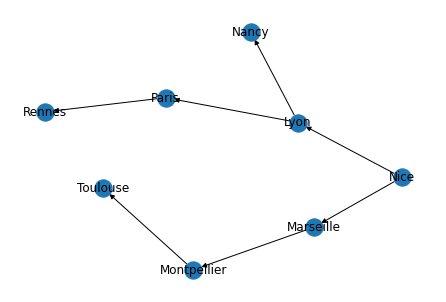

In [7]:
print("Liste des chemins suivis")
print("------------------------")
print(list(nx.bfs_edges(G, source="Nice")))

print("\nReprésentation sous forme d'arbre")
print("---------------------------------")
tree = nx.bfs_tree(G, source="Nice")
nx.draw(tree, with_labels=True, pos=nx.spring_layout(G))

L'ordre de parcours des chemins dépend de l'ordre dans lequel les voisins sont visités par la méthode `neighbors`. Cependant on observe bien que l'algorithme explore toujours tous les voisins d'un sommet avant d'avancer d'une profondeur supplémentaire.

::: appli

- Reproduire le graphe est l'annoter avec des flèches numérotées pour indiquer l'ordre de viste.
- Proposer un autre parcours en largeur au départ de Nice.

:::

## Repérer la présence d'un cycle

::: {.def terme="cycle"}

Un cycle est une suite d'arêtes consécutives (chaine simple) dont les deux sommets extrémités sont identiques.

:::

::: example

Dans notre graphique Nice - Marseille - Lyon forme un cycle

:::

::: plus

La détection de cycle peut-être interressante par exemple en programmation concurrente dans les systèmes d'exploitation pour détecter un interblocage(_deadlock_) qui se produit lorsque des processus concurrents s'attendent mutuellement.

Les processus bloqués dans cet état le sont définitivement, il s'agit donc d'une situation catastrophique.

:::

### Principe

Pour détecter un cycle nous allons simplement parcourir le graphe en profondeur et vérifier qu'aucune arête pointe vers un noeud déjà visité(présence d'un _backedge_).

```
FONCTION recherche_cycle(G graph, s sommet)
    marquer v comme visté
    POUR TOUS les sommets voisins v de s FAIRE
        SI v n'est pas marqué comme visité ALORS
            APPELER RECURSIVEMENT recherche_cycle(G, v)
        SINON
            # On a découvert un cycle
            renvoyer VRAI
    # Aucun cycle découvert après parcours complet
    renvoyer FAUX
```


### Implémentation

Voici le code proposé.

Présence d'un cycle
-------------------
True

Pour rappel: Forme du graphe
----------------------------


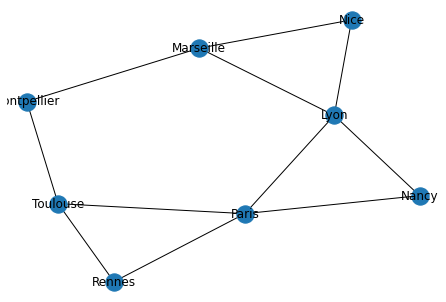

In [8]:
# On repart d'un graphe tout neuf
G = create_graph()
# Transformation en liste d'adjacence
dg = nx.to_dict_of_lists(G)

def recherche_cycle(G, s, vus=None):
    # ATTENTION: Liste vide par défaut
    # voir: https://lyceum.fr/blog/2021-04-02-comment-passer-une-liste-vide-par-defaut-a-une-fonction-en-python/
    if vus is None:
        vus = []
    # on récupère la liste des voisins
    voisins = G[s]
    # marquer le sommet s
    vus.append(s)
    # POUR TOUT sommet t voisin du sommet s
    for t in voisins:
        if t in vus:
            return True
        # SI t n'est pas marqué ALORS
        else:
            recherche_cycle(G, t, vus)
    return False

print("Présence d'un cycle")
print("-------------------")
print(recherche_cycle(dg, "Nice"))

# Test de la fonction à partir de tous les noeuds de départ
for node in G.nodes:
    # networkx est capable de trouver des cycles
    assert nx.find_cycle(G, source=node)
    # on teste notre fonction maintenant
    assert node, recherche_cycle(dg, node)
    
print("\nPour rappel: Forme du graphe")
print(  "----------------------------")
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

Présence d'un cycle
-------------------
False

Pour rappel: Forme du graphe
----------------------------


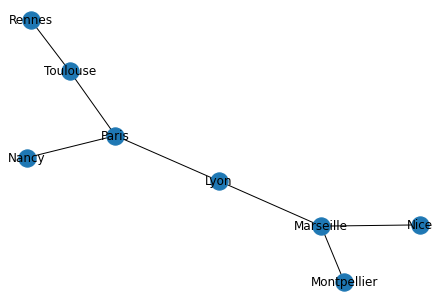

In [9]:
# Nous supprimons quelques arêtes pour
# retirer les cycles et tester la fonction
def create_acyclic_graph():
    G = create_graph()
    G.remove_edge("Nice", "Lyon")
    G.remove_edge("Nancy", "Lyon")
    G.remove_edge("Paris", "Rennes")
    G.remove_edge("Toulouse", "Montpellier")
    return G

G = create_acyclic_graph()
# Transformation en liste d'adjacence
dg = nx.to_dict_of_lists(G)

print("Présence d'un cycle")
print("-------------------")

print(recherche_cycle(dg, "Paris"))

# Test de la fonction à partir de tous les noeuds de départ
for node in G.nodes:
    try:
        nx.find_cycle(G, source=node)
        assert False
    except nx.NetworkXNoCycle:
        pass
    G = create_acyclic_graph()
    assert not recherche_cycle(dg, node)

print("\nPour rappel: Forme du graphe")
print(  "----------------------------")
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

::: {.plus titre="Recherche d'un cycle dans un graphe orienté"}

Le recherche d'un cycle dans un graphe orienté et plus délicate, on utilise classiquement un système de trois couleurs NOIR GRIS BLANC lors du parcours du graphe.

- BLANC: le sommet n'est pas encore traité. Au départ, tous les sommets sont BLANC.
- GRIS: le sommet est en cours de traitement (le parcours en profondeur pour ce sommet a commencé, mais pas terminé, ce qui signifie que tous les descendants (dans l'arborescence du parcours) de ce sommet ne sont pas encore traités.
- NOIR: le sommet et tous ses descendants sont traités. Si une arête est rencontrée entre le sommet actuel et un sommet GRIS, alors cette arête est l'arête arrière et il y a donc un cycle.

*[Article geek for geeks en anglais](https://www.geeksforgeeks.org/detect-cycle-direct-graph-using-colors/)*{cite-source}

:::

## Chercher un chemin dans un graphe

La recherche de chemin(_pathfinding_), et un domaine important de recherche dans le développement de l'intelligence artificielle et de la robotique.


### Plus court chemin dans un graphe non pondéré

Le plus court chemin à travers un graphe non pondéré est utilisé dans le protocole réseau [RIP](/tg/nsi/3-architectures-materielles-systemes-dexploitation-et-reseaux/3-protocoles-de-routage).

Il se base simplement sur un *parcours en profondeur* pour s'assurer que le nombre d'arêtes traversées est minimum.

Si le sommet est rencontré, on renverra le chemin suivi.

Pour cela on ajoute à notre algorithme un dictionnaire qui stocke la liste des prédecesseurs lors du parcours.

On teste sur tous les trajets possibles
---------------------------------------
Paris -> Lyon: ['Paris', 'Lyon']
Paris -> Marseille: ['Paris', 'Lyon', 'Marseille']
Paris -> Nice: ['Paris', 'Lyon', 'Nice']
Paris -> Montpellier: ['Paris', 'Toulouse', 'Montpellier']
Paris -> Toulouse: ['Paris', 'Toulouse']
Paris -> Rennes: ['Paris', 'Rennes']
Paris -> Nancy: ['Paris', 'Nancy']
Lyon -> Marseille: ['Lyon', 'Marseille']
Lyon -> Nice: ['Lyon', 'Nice']
Lyon -> Montpellier: ['Lyon', 'Marseille', 'Montpellier']
Lyon -> Toulouse: ['Lyon', 'Paris', 'Toulouse']
Lyon -> Rennes: ['Lyon', 'Paris', 'Rennes']
Lyon -> Nancy: ['Lyon', 'Nancy']
Marseille -> Nice: ['Marseille', 'Nice']
Marseille -> Montpellier: ['Marseille', 'Montpellier']
Marseille -> Toulouse: ['Marseille', 'Montpellier', 'Toulouse']
Marseille -> Rennes: ['Marseille', 'Lyon', 'Paris', 'Rennes']
Marseille -> Nancy: ['Marseille', 'Lyon', 'Nancy']
Nice -> Montpellier: ['Nice', 'Marseille', 'Montpellier']
Nice -> Toulouse: ['Nice', 'Marseille

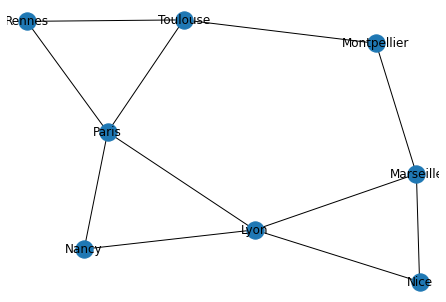

In [11]:
# On repart d'un graphe tout neuf
G = create_graph()
# On crée la liste d'adjacence
dg =nx.to_dict_of_lists(G)

# FONCTION plus court chemin(Graphe G, Sommet s, Destination d):
def plus_court_chemin(G, s, d):
    # dictionnaire des prédecesseurs
    prédecesseurs = {s: None}
    # f = CreerFile();
    f = file()
    # f.enfiler(s);
    f.appendleft(s)
    # marquer(s);
    marqués = [s]
    # TANT QUE la file est non vide
    while f:
        # On récupère le noeud
        s = f.pop()
        # POUR TOUT voisin t de s dans G
        for t in G[s]:
            if t == d:
                # Destination trouvée, on remonte le chemin
                ville = s
                chemin = [d]
                while ville:
                    chemin.append(ville)
                    ville = prédecesseurs[ville]
                # On remet dans l'ordre
                chemin.reverse()
                return chemin
            # SI t non marqué
            elif t not in marqués:
                # f.enfiler(t);
                f.appendleft(t)
                # marquer(t);
                marqués.append(t)
                # màJ du dictionnaire de prédecesseurs  
                prédecesseurs[t] = s
    # Destination non trouvée        
    return []
                

print("On teste sur tous les trajets possibles")
print("---------------------------------------")
villes = G.nodes
from itertools import combinations
for source, dest in combinations(villes, 2):
    chemin = plus_court_chemin(dg, source, dest)
    print(f"{source} -> {dest}: {chemin}")

print("\nSi la destination n'est pas trouvée")
print("-----------------------------------")
source, dest = "Nice", "Tokyo"
chemin = plus_court_chemin(dg, source, dest)
print(f"{source} -> {dest}: {chemin}")


print("\nPour vérification: Forme du graphe")
print("------------------------------------")
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

### Plus court chemin dans un graphe pondéré

Souvent, on s'intéressera plus précisément à la recherche du plus court chemin sur des graphes pondérés, c’est-à-dire sur lesquelles on ajoute un poids à l'arête, dans notre exemple, on pourrait ajouter les temps ou distance des routes entre chaque ville.

On peut également citer le protocole réseau [OSPF](/tg/nsi/3-architectures-materielles-systemes-dexploitation-et-reseaux/3-protocoles-de-routage) qui vise à optimiser les vitesses de transmission à travers les réseaux.

Il existe deux principaux algorithmes de plus court chemin, cette vidéo, vous présente l'algorithme de Dijkstra.

::: plus

`youtube: JPeCmKFrKio`

:::

<!--
Le programme ne demandant que le recherche d'un chemin dans un graphe, je vous présente un algorithme de recherche de chemin qui indique simplement le chemin s'il existe sans s'assurer qu'il s'agit du plus court chemin.

Utilisons un parcours en largeur pour faire cette recherche qui permettra de minimiser le nombre d'arêtes traversées par rapport à une recherche en profondeur.

-->

Un article très détaillé et illustré est disponible à cette adresse: https://perso.liris.cnrs.fr/vincent.nivoliers/lifap6/Supports/Cours/graph_traversal.html

<!--
# On repart d'un graphe non annoté
G = create_graph()

# FONCTION parcours_largeur(Graphe G, Sommet s):
def recherche_chemin(G, départ=None, arrivée=None):
    """Recherche de chemin
    
    On se contente d'indiquer si le chemin existe
    
    Returns
    -------
    bool
    """
    profondeur = 0
    #f = CreerFile();
    #f.enfiler(s);
    f = [départ]
    #marquer(s);
    node = G.nodes[départ]
    node["visited"] =  True
    #TANT QUE la file est non vide
    while f:
        #s = f.defiler();
        s = f.pop()
        #POUR TOUT voisin t de s dans G
        for t in G.neighbors(s):
            node = G.nodes[t]            
            if t == arrivée:
                return True
            #SI t non marqué
            elif not(node.get("visited")):
                #f.enfiler(t);
                f.insert(0, t)
                #marquer(t);
                # marquer le sommet s
                node["visited"] =  True
    return False
                

print("Liste des noeuds visités par notre algorithme")
print("---------------------------------------------")
print(recherche_chemin(create_graph(), "Nice", "Paris"))
print(recherche_chemin(create_graph(), "Nice", "Rennes"))
print(recherche_chemin(create_graph(), "Nice", "Massilia"))
# je ne sais pas d'ou vient ce dernier None!

print("\nPour rappel: Forme du graphe")
print("------------------------------")
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

-->

::: ref

- [Article Wikipédia sur l'Algorithme de parcours en profondeur][wkp_dfs]
- [Article Wikipédia sur l'Algorithme de parcours en largeur][wkp_dfs]


[wkp_dfs]: https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur

[wkp_bfs]: https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur

:::